In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import statsmodels.tsa

In [9]:
data = pd.read_csv('processed_ds1_telengana_predicted.csv')



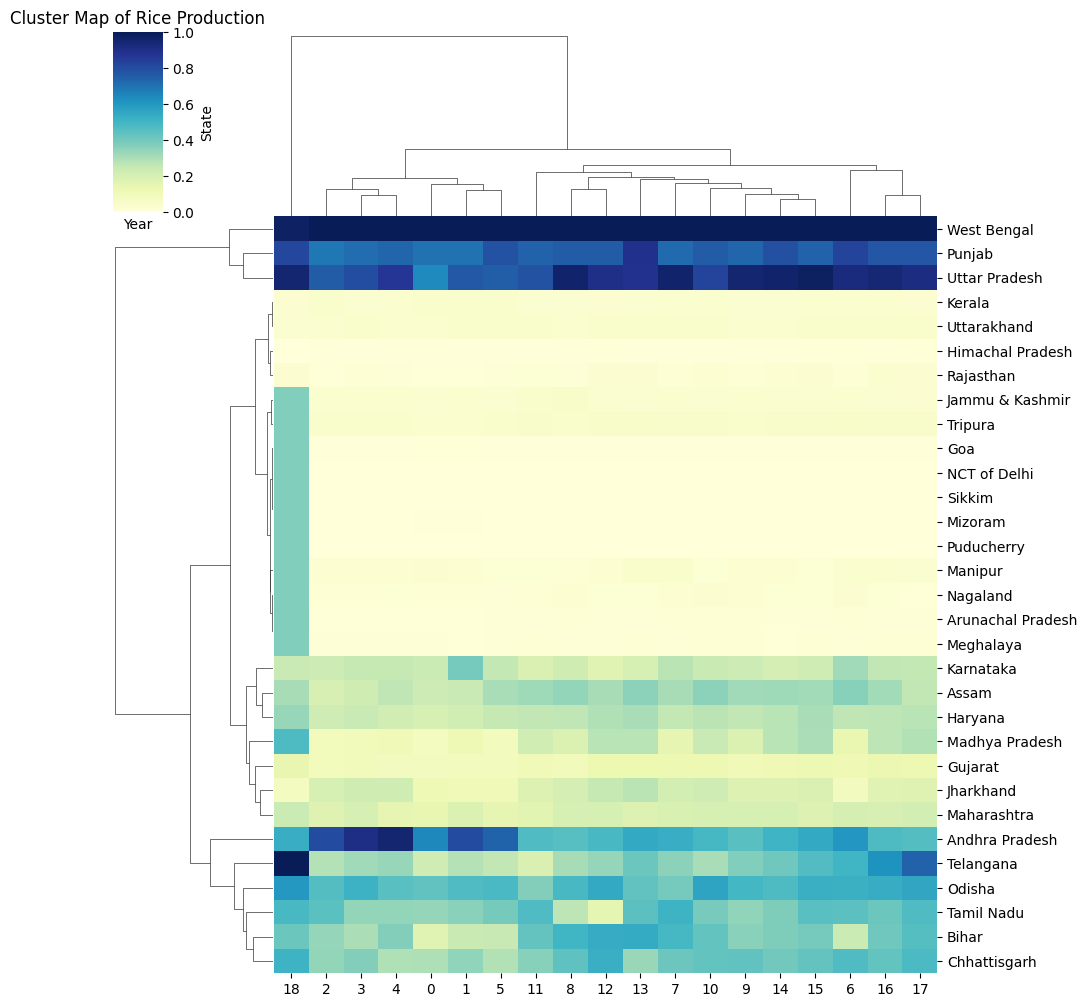

In [4]:

data.replace('-', np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

cleaned_data = data.drop(columns=['Year', 'ALL INDIA']).T

# Replace NaN values with the median of each state
# You can also consider using the mean or any other method that suits your analysis
cleaned_data.fillna(cleaned_data.median(), inplace=True)

# Check for and replace inf/-inf with NaN, then fill those NaNs
cleaned_data.replace([np.inf, -np.inf], np.nan, inplace=True)
cleaned_data.fillna(cleaned_data.median(), inplace=True)

# Ensure all data are now finite
assert np.all(np.isfinite(cleaned_data)), "Data contains non-finite values."

# Proceed with the cluster map
sns.clustermap(cleaned_data, cmap='YlGnBu', standard_scale=1)
plt.title('Cluster Map of Rice Production')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


# Analysis of Rice Production Cluster Map

The cluster map provides a visual representation of rice production patterns across various states and over time.

## Insights from the Cluster Map:

1. **State Clusters**: States that are close to each other in the dendrogram may have similar agricultural conditions or practices. For instance, if states like Punjab and Haryana are close, it might be due to both being in India's "wheat belt," known for their fertile land and similar cropping patterns.

2. **Temporal Clusters**: Certain years clustering together may point to national-level factors that influenced rice production, such as nationwide policies, market changes, or widespread climatic events.

3. **Outliers**: Any state or year that stands alone or is significantly distanced from others in the dendrogram might indicate an outlier year for production due to extraordinary events.

4. **Production Trends**: A consistent gradient of color (e.g., from light to dark horizontally) could suggest an overall increase or decrease in production over time.


